# Event-related fields

Event-related fields (ERFs) as well as event-related potentials are generated by neuronal activity elicited by a given events. They are often used in cognitive and clinical neurosciene to quantify the brain activity associated with a given task (Luck 2014, Woodman 2010). The aim of this section is generate event-related fields (ERFs) in response to the visual input and to do some simple plotting of time course and topographies. Event-related fields are generated by neuronal activity phase-locked to a given events.

## Preparation
Import the relevant modules.

In [ ]:
import os.path as op
import os

import mne
from mne_bids import BIDSPath, read_raw_bids


See the local paths of the data:

In [3]:
subject = '01'
session = '01'
task = 'SpAtt'  # name of the task
run = '12'  # both runs compbined
meg_suffix = 'meg'
epo_suffix = 'epo'

deriv_root = r'Z:\Projects\FLUX\MEG_data\Course\derivatives'  # path of the derivatives, similar structure to bids raw data 
bids_path = BIDSPath(subject=subject, session=session,
            task=task, run=run, suffix=epo_suffix, datatype='meg',
            root=deriv_root, extension='fif', check=False)
print(bids_path.basename,bids_path.fpath)


sub-01_ses-01_task-SpAtt_run-12_epo.fif Z:\Projects\FLUX\MEG_data\Course\derivatives\sub-01\ses-01\meg\sub-01_ses-01_task-SpAtt_run-12_epo.fif
Z:\Projects\FLUX\MEG_data\Course\derivatives\sub-01\ses-01\meg\sub-01_ses-01_task-SpAtt_run-12_ave.fif
Z:\Projects\FLUX\MEG_data\Course\openneuro\sub-01\ses-01\meg\sub-01_ses-01_task-SpAtt_run-02_events.tsv


C:\Users\ghafarit\AppData\Local\Temp\ipykernel_9012\1649322676.py:10: FutureWarning: extension should start with a period ".", but got: "fif". Prepending "." to form: ".fif". This will raise an exception starting with MNE-BIDS 0.12.
  bids_path = BIDSPath(subject=subject, session=session,
C:\Users\ghafarit\AppData\Local\Temp\ipykernel_9012\1649322676.py:20: FutureWarning: extension should start with a period ".", but got: "tsv". Prepending "." to form: ".tsv". This will raise an exception starting with MNE-BIDS 0.12.
  raw_path = bids_path.copy().update(root=r'Z:\Projects\FLUX\MEG_data\Course\openneuro',


Read the epochs:

In [4]:
epochs = mne.read_epochs(bids_path.fpath,
                         preload=True,
                         verbose=True)

Reading Z:\Projects\FLUX\MEG_data\Course\derivatives\sub-01\ses-01\meg\sub-01_ses-01_task-SpAtt_run-12_epo.fif ...
    Found the data of interest:
        t =   -2500.00 ...    2000.00 ms
        0 CTF compensation matrices available
Not setting metadata
139 matching events found
No baseline correction applied
0 projection items activated


## Averaging the trial data
Identify the epochs for the left condition with respect to the onset of the moving gratings and then average over trials. Subsequently apply a lowpass filter at 30 Hz and crop the data to the time interval from -100 to 400 ms from stimulus onset. The 30 Hz low-pass filter is typically used for cognitive type event-related responses.


In [5]:
evoked_left= epochs['cue_left'].copy().average(method='mean').filter(0.0, 30).crop(-0.1,0.4)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    1.2s finished


## Plotting event-related fields

To plot the single trials and the averaged event-related fields for a single magnetometer write:

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 20196 out of 20196 | elapsed:   42.2s finished


Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated


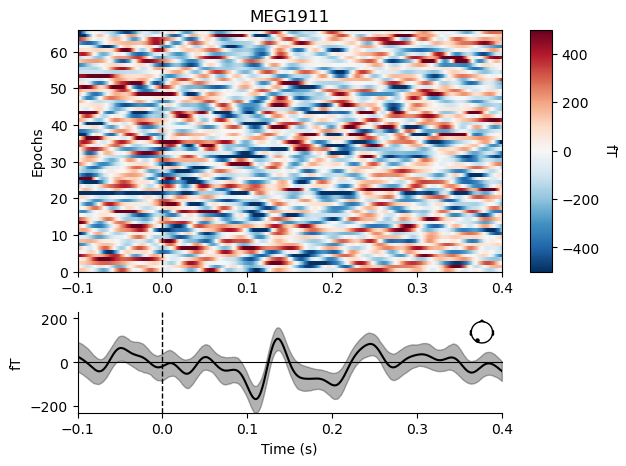

In [6]:
epochs['cue_left'].copy().filter(0.0,30).crop(-0.1,0.4).plot_image(picks=['MEG1911'],vmin=-500,vmax=500);

Applying baseline correction (mode: mean)


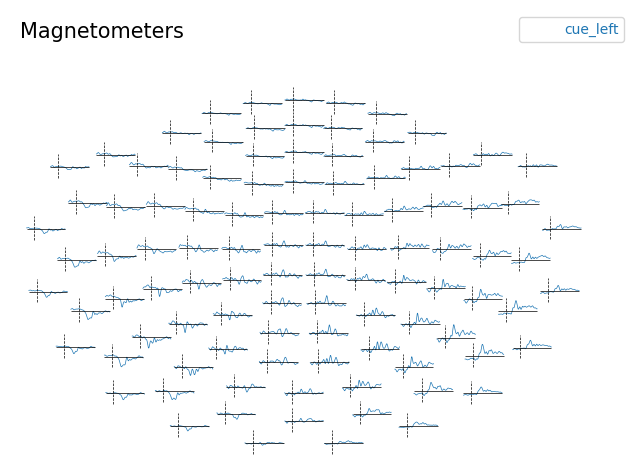

In [7]:
evoked_left.copy().apply_baseline(baseline=(-0.1, 0))
evoked_left.copy().pick_types(meg='mag').plot_topo(title = 'Magnetometers');

Above shows the event-related fields from -100 to 400 ms over each magnetometer. Note the strong response at ~110 ms over posterior sensors. This is often referred to as N100m.

To plot a topographic map of the response at 110 ms write:

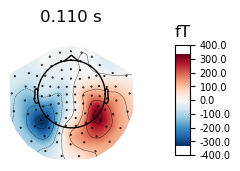

In [8]:
evoked_left.plot_topomap(0.110, ch_type='mag', time_unit='s');

**Question 1:** Explain how an equivalent current dipole (ECD) can account for the posterior event-related field by drawing the ECD on top of the topographic plot (hint: consider the 'right-hand rule')

**Question 2:** Plot a sequence of topographic maps for the time-points ranging from 0 to 300 ms in steps of 20 ms.


Now we plot the same event-related fields over each planar gradiometer. Baseline correction is applyed beforehand 

Applying baseline correction (mode: mean)


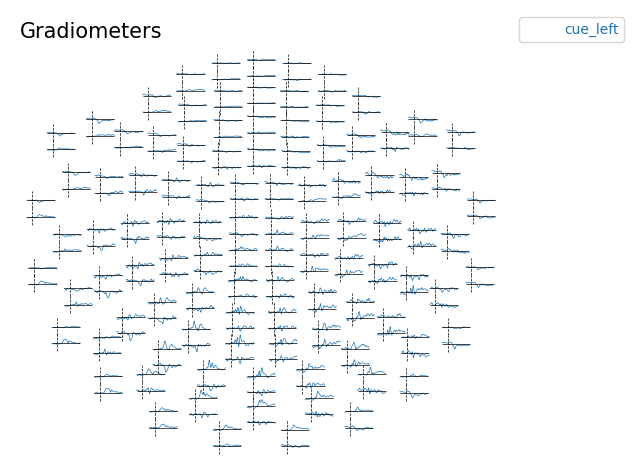

In [9]:
evoked_left.copy().apply_baseline(baseline=(-0.1, 0))
evoked_left.copy().pick_types(meg='grad').plot_topo(title = 'Gradiometers');

The planar gradiometers are arranged in pairs. Each pair is composed of two orthogonal planar sensors (ending in XXX2 and XXX3). It is not straightforward to interpret the field maps for planar gradiometers. Nevertheless, the magnitude of the planar gradiometers is typically the largest directly above a given current dipole.

**Question 3:** Why is the magnitude of the planar gradient typically strongest directly above a current dipole (hint: explain on the basis of the topographic map of the N100m)

To better interpret the planar gradiometers one can apply the root-mean-square operation in which the magnitude of the field for two orthogonal gradiometers are combined:

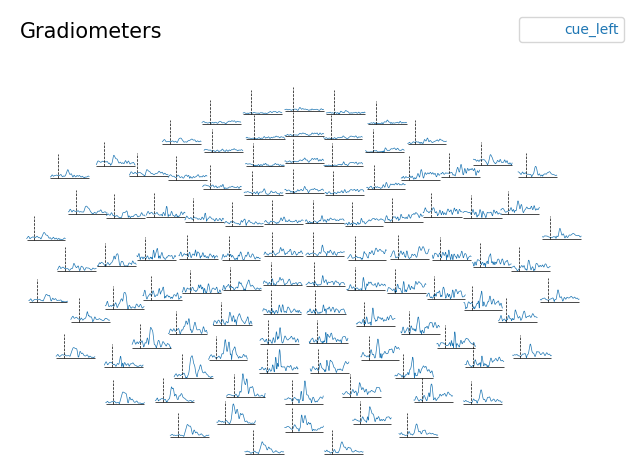

In [10]:
evoked_left.copy().pick_types(meg='grad').plot_topo(title='Gradiometers', merge_grads=True);

To plot a topographic map of the combined planar gradient at 110 ms write:

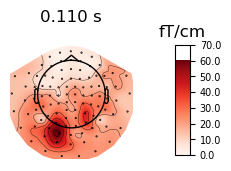

In [11]:
evoked_left.plot_topomap(0.11, ch_type='grad', time_unit='s');

**Question 3:** Interpret the topograpgy of the combined planar gradient in relation to the dipolar map (see Question 1).

## Preregistration and publications

Publication, example:

"Prior to calculating the event-related fields, the data were lowpass filtered at 30 Hz (non-causal finite impulse response filter implemented using a Hamming window and a 441 sample filter length). After averaging, a 100 ms baseline was subtracted."

## References 

Woodman G.F. (2010) A brief introduction to the use of event-related potentials in studies of perception and attention. Atten Percept Psychophys. 72(8):2031-46.

Luck, S.J. (2014) An Introduction to the Event-Related Potential Technique, Second Edition. Bradford Books

(many of the recommendation for calculated event-related potentials also apply to calculating event-related fields)
